## Load labels from single datasets

GPT-4o-mini Train Dataset: Counter({3: 87975, 2: 86132, 4: 59969, 1: 44401, 0: 18626, 5: 3829})
LlaMA-3.1-8B-Instruct Train Dataset: Counter({3: 116114, 4: 57669, 2: 48254, 1: 47402, 0: 27386, 5: 4107})
Mistral-7B-Instruct-v0.3 Train Dataset: Counter({3: 118313, 4: 66181, 2: 60607, 1: 52908, 0: 2436, 5: 487})


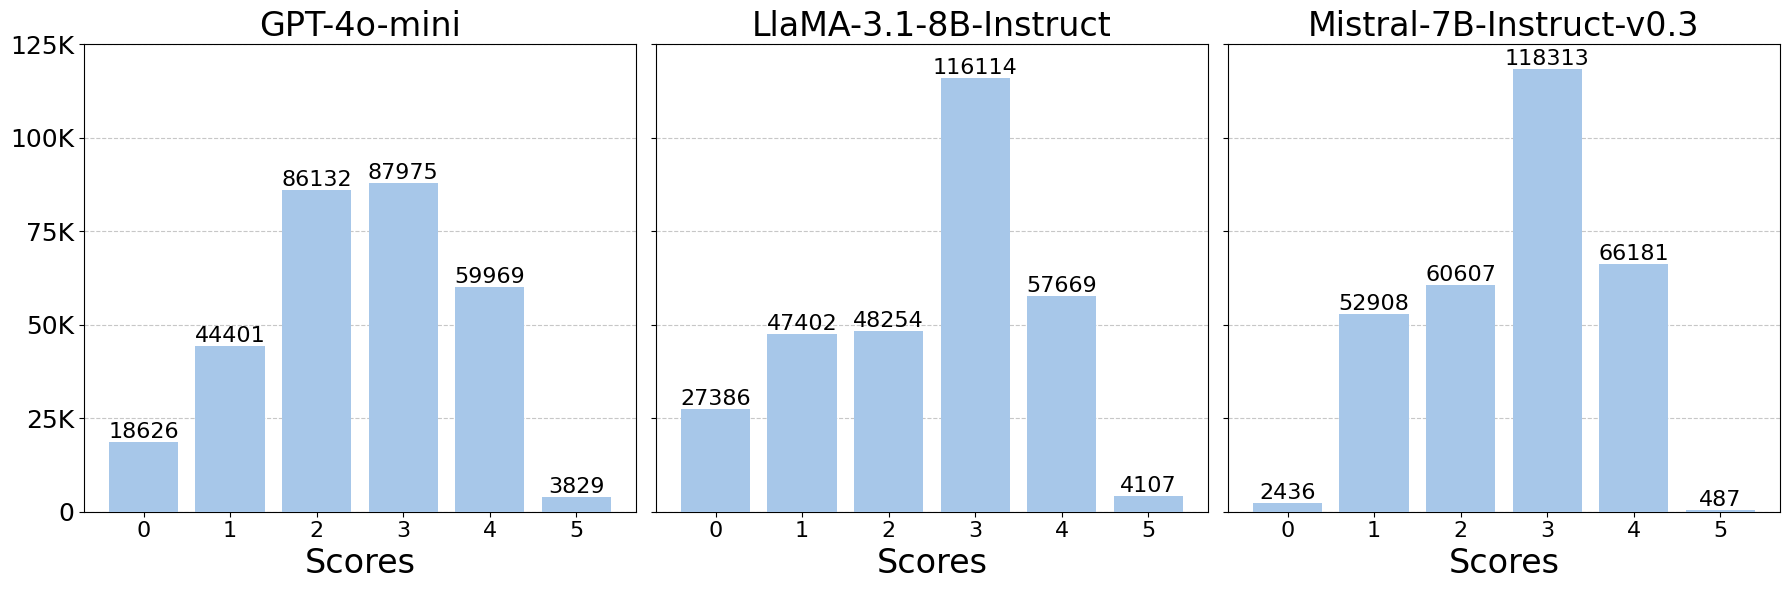

In [2]:
import os
import torch
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define model names and paths
models = ["gpt-4o-mini", "meta-llama/Meta-Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.3"]
root_path = "./model_finetune/selected_data/"

# Create subplots for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model_name in enumerate(models):

    path = os.path.join(root_path, f"{model_name}/all_train/output_labels_revised.pt")
    all_labels = torch.load(path)

    # Map model name for display
    display_name = {
        "gpt-4o-mini": "GPT-4o-mini",
        "meta-llama/Meta-Llama-3.1-8B-Instruct": "LlaMA-3.1-8B-Instruct",
        "mistralai/Mistral-7B-Instruct-v0.3": "Mistral-7B-Instruct-v0.3"
    }.get(model_name, model_name)

    # Count label frequencies
    label_counts = Counter(all_labels)
    print(f"{display_name} Train Dataset: {label_counts}")
    
    # Prepare data for plotting
    labels = list(label_counts.keys())
    counts = list(label_counts.values())
    
    # Plot bar chart for the current model
    bars = axs[i].bar(labels, counts, width=0.8, color='#A7C7E9', zorder=3)
    
    # Add data labels to each bar
    for bar in bars:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=16)
        
    # Human-readable y-axis formatter for large numbers
    def human_format(x, pos):
        if x >= 1e6:
            return f'{x * 1e-6:.1f}M'
        elif x >= 1e3:
            return f'{x * 1e-3:.0f}K'
        else:
            return f'{x:.0f}'

    axs[i].yaxis.set_major_formatter(FuncFormatter(human_format))
    
    # Set titles and axis labels
    axs[i].set_title(f'{display_name}', fontsize=24)
    axs[i].set_xlabel('Scores', fontsize=24)

    # Customize x and y ticks
    axs[i].tick_params(axis='x', rotation=0, labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)
    y_ticks = range(0, int(max(counts) + 25000), 25000)  # Set y-tick interval
    axs[i].set_yticks(y_ticks)

# Add y-axis label for all subplots
fig.text(0.04, 0.5, 'Count', va='center', ha='center', fontsize=18, rotation='vertical')

# Add grid lines to each subplot
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Display the plot with adjusted layout
plt.tight_layout()
plt.show()


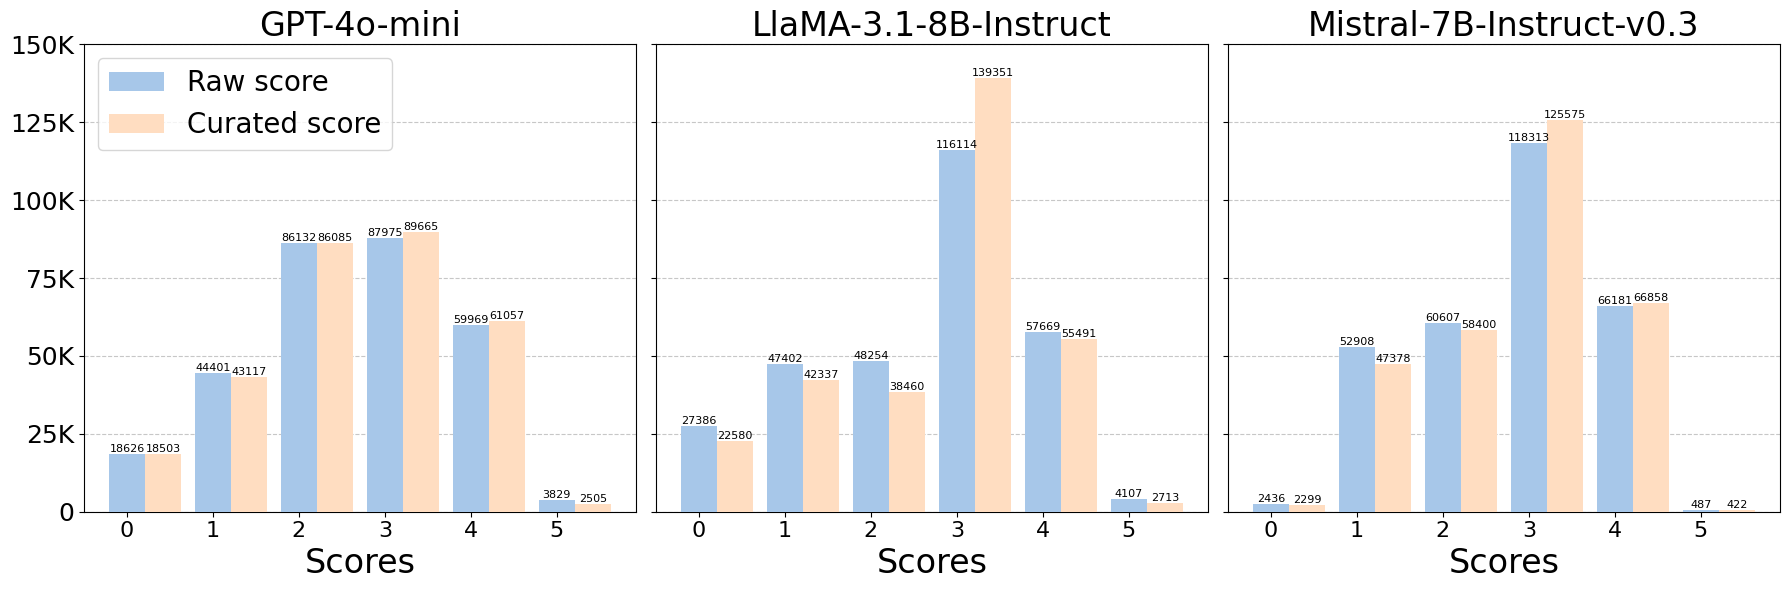

In [13]:
import os
import torch
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Define model names and root path
models = ["gpt-4o-mini", "meta-llama/Meta-Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.3"]
root_path = "./model_finetune/selected_data/"

# Create subplots for each model
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model_name in enumerate(models):

    # Define paths for original and curated label files
    path_original = os.path.join(root_path, f"{model_name}/all_train/output_labels_revised.pt")
    path_cured = os.path.join(root_path, f"{model_name}/all_train/output_labels_revised_cured.pt")

    # Load labels from both files
    all_labels_original = torch.load(path_original)
    all_labels_cured = torch.load(path_cured)

    # Map model name for display
    display_name = {
        "gpt-4o-mini": "GPT-4o-mini",
        "meta-llama/Meta-Llama-3.1-8B-Instruct": "LLaMA-3.1-8B-Instruct",
        "mistralai/Mistral-7B-Instruct-v0.3": "Mistral-7B-Instruct-v0.3"
    }.get(model_name, model_name)

    # Calculate label counts for both original and cured labels
    label_counts_original = Counter(all_labels_original)
    label_counts_cured = Counter(all_labels_cured)

    # Extract labels and counts, assuming both sets have identical labels
    labels = list(label_counts_original.keys())
    counts_original = [label_counts_original[label] for label in labels]
    counts_cured = [label_counts_cured[label] for label in labels]

    # Plot both sets of bars for original and cured counts
    bar_width = 0.42
    bars_original = axs[i].bar(labels, counts_original, bar_width, label='Raw score', color='#A7C7E9', zorder=3)
    bars_cured = axs[i].bar([x + bar_width for x in labels], counts_cured, bar_width, label='Curated score', color='#FFDDC1', zorder=3)

    # Add labels above bars for each bar set
    for bar in bars_original:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)

    for bar in bars_cured:
        yval = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)
        
    # Format y-axis with human-readable labels (K for thousands, M for millions)
    def human_format(x, pos):
        if x >= 1e6:
            return f'{x * 1e-6:.1f}M'
        elif x >= 1e3:
            return f'{x * 1e-3:.0f}K'
        else:
            return f'{x:.0f}'
    
    axs[i].yaxis.set_major_formatter(FuncFormatter(human_format))

    # Set titles and labels
    axs[i].set_title(f'{display_name}', fontsize=24)
    axs[i].set_xlabel('Scores', fontsize=24)

    # Adjust x and y ticks for readability
    axs[i].tick_params(axis='x', rotation=0, labelsize=16)
    axs[i].tick_params(axis='y', labelsize=16)
    y_ticks = range(0, int(max(counts_original + counts_cured) + 25000), 25000)
    axs[i].set_yticks(y_ticks)

# Add a common y-axis label
fig.text(0.04, 0.5, 'Count', va='center', ha='center', fontsize=18, rotation='vertical')

# Add a legend in the first subplot
axs[0].legend(loc='upper left', fontsize=20)

# Add grid lines to each subplot
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# Display plot with tight layout
plt.tight_layout()
plt.show()


## Plot score transition matrix

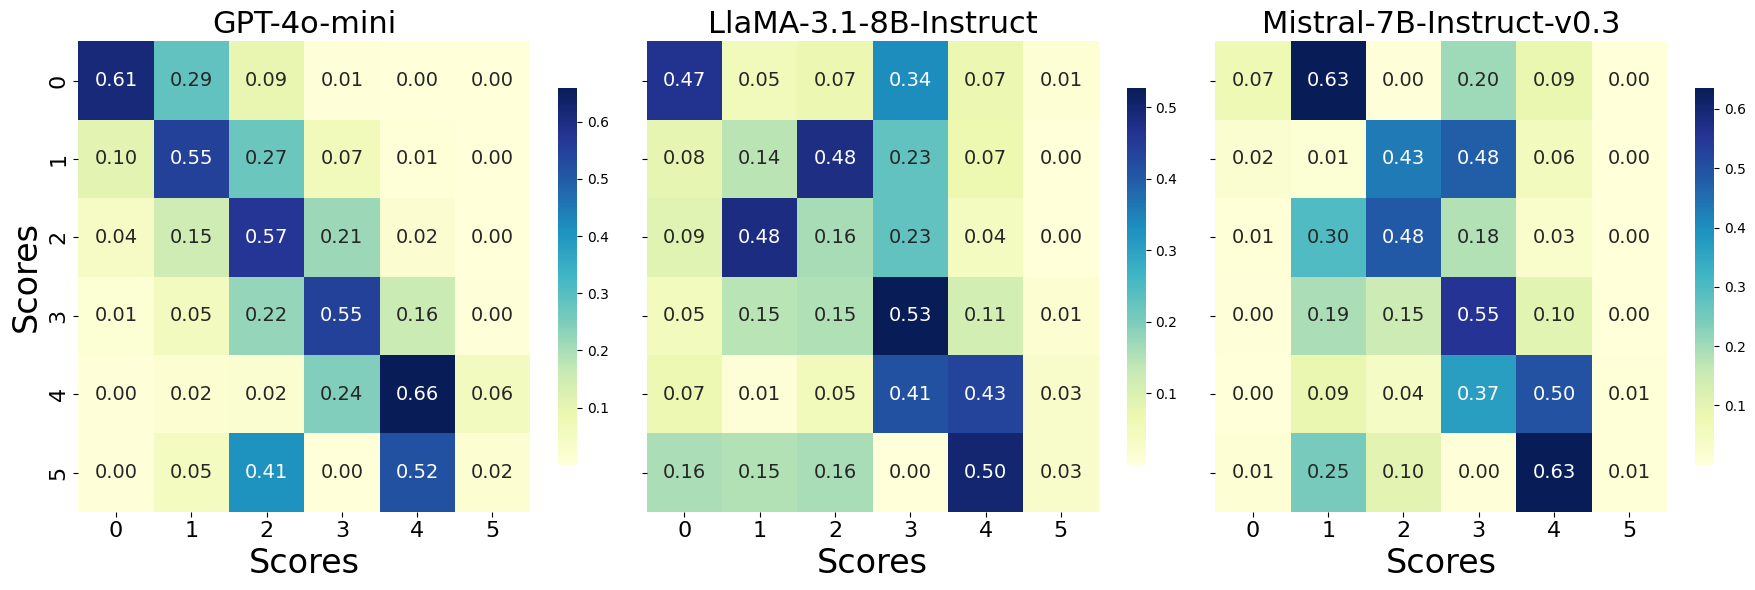

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# Define dataset and models to analyze
dataset_list = ['all_train']
model_names = ["gpt-4o-mini", "meta-llama/Meta-Llama-3.1-8B-Instruct", "mistralai/Mistral-7B-Instruct-v0.3"]

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, model_name in enumerate(model_names):
    for dataset_name in dataset_list:
        # Define report path
        report_path = f"score_curation/results-embedding-model-bge/{model_name}/{dataset_name}/{dataset_name}_report.pt"
        
        # Load report data
        reports = torch.load(report_path)

        # Format model name for title display
        display_name = {
            "gpt-4o-mini": "GPT-4o-mini",
            "meta-llama/Meta-Llama-3.1-8B-Instruct": "LLaMA-3.1-8B-Instruct",
            "mistralai/Mistral-7B-Instruct-v0.3": "Mistral-7B-Instruct-v0.3"
        }.get(model_name, model_name)

        # Get diagnosis data for heatmap
        data = reports.diagnose['T']

        # Draw heatmap in each subplot
        sns.heatmap(data, annot=True, fmt=".2f", cmap="YlGnBu", ax=axs[i],
                    annot_kws={"size": 14},  # Increase font size for annotations
                    cbar_kws={"shrink": 0.8})  # Adjust color bar size
        
        # Set ticks and labels for each subplot
        axs[i].tick_params(axis='x', rotation=0, labelsize=16)
        axs[i].tick_params(axis='y', labelsize=16)
        axs[i].set_title(f'{display_name}', fontsize=22)
        axs[i].set_xlabel('Scores', fontsize=24)
        
        # Only set ylabel for the first subplot to avoid redundancy
        axs[i].set_ylabel('Scores', fontsize=24) if i == 0 else axs[i].set_ylabel('')

# Adjust layout for clarity
plt.tight_layout()
plt.show()


## Concatenate the data samples

In [4]:
import os
from datasets import load_dataset, concatenate_datasets

# Define the directory and list of dataset files to combine
json_dir = './data/train_data/'
DATASET_LIST = ['flan_v2', 'oasst1', 'wizardlm', 'dolly', 'stanford_alpaca']

# Initialize an empty list to hold each loaded dataset
datasets = []

# Loop through each dataset in the list, load it, and append it to datasets
for dataset_name in DATASET_LIST:
    jsonl_file = os.path.join(json_dir, f"{dataset_name}_data.jsonl")
    dataset = load_dataset('json', data_files=jsonl_file)['train']
    datasets.append(dataset)

# Concatenate all loaded datasets into one combined dataset
combined_dataset = concatenate_datasets(datasets)

# Define output path and save the combined dataset as a JSONL file
output_dataset_path = os.path.join(json_dir, 'all_train_data.jsonl')
combined_dataset.to_json(output_dataset_path)

print(f"Hugging Face Dataset saved to {output_dataset_path}")
print(f"Total train data size: {len(combined_dataset)}")


Creating json from Arrow format: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:08<00:00, 37.15ba/s]


Hugging Face Dataset 已保存到 ./data/train_data/all_train_data.jsonl
######## total train data size: 300932


## Calculating the embedding

In [ ]:
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

# Mean pooling for generating sentence embeddings
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
dataset_name = "tulu"
dataset_path = f'{dataset_name}_dataset.parquet'
data = load_dataset('parquet', data_files=dataset_path)
dialogs = data['train']

# Process dialogues into a structured format
def process_dialog(dialog):
    conversation = ""
    for message in dialog['messages']:
        conversation += f"### {message['role']}: {message['content']}\n"
    return {"features": conversation}

data['train'] = data['train'].map(process_dialog, batched=False)

# Load pre-trained model and tokenizer
model_name = "BAAI/bge-large-en-v1.5"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to(device)

# Generate embeddings for each entry in the dataset
def embed_text(batch):
    encoded_inputs = tokenizer(batch['features'], padding=True, truncation=True, return_tensors="pt").to(device)
    with torch.no_grad():
        model_outputs = model(**encoded_inputs)
    sentence_embeddings = mean_pooling(model_outputs, encoded_inputs['attention_mask'].to(device))
    embeddings = F.normalize(sentence_embeddings, p=2, dim=1)
    batch['embeddings'] = embeddings.cpu().numpy().tolist()
    return batch

data['train'] = data['train'].map(embed_text, batched=True, batch_size=128)

# Save the embeddings to a Parquet file
data['train'].to_parquet(f'{dataset_name}_embeddings.parquet')
print(f"Embeddings saved to {dataset_name}_embeddings.parquet")
